In [1]:
from LZGraphs import NDPLZGraph

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from tqdm.notebook import tqdm
mpl.rcParams['figure.figsize'] = (15,7)
import numpy as np
sns.set_context('poster')

/home/thomas/Desktop/LZGraphs/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Creating an LZGraph for a Repertoire

In [2]:
example_sequences = pd.read_csv('ExampleData2.csv',
                               index_col=0)
example_sequences

,cdr3_rearrangement,V,J
24735,TGTGCCTGCGTAACACAGGGGGTTTGGTATGGCTACACCTTC,TRBV30-1*01,TRBJ1-2*01
8790,TGTGCCAGTAGCCCTAACAGATCTGGAAACACCATATATTTT,TRBV19-1*01,TRBJ1-3*01
2956,TGTGCCAGCAGTTTCTCCCCCCCCTACGAGCAGTACTTC,TRBV27-1*01,TRBJ2-7*01
20041,TGCGCCAGCAGCTTGGCCGTGAACTACAACACCGGGGAGCTGTTTTTT,TRBV5-1*01,TRBJ2-2*01
3144,TGTGCCAGCAGCTCGCAGGGTCTCTCCTACGAGCAGTACTTC,TRBV7-9*01,TRBJ2-7*01
...,...,...,...
16997,TGTGCCAGCAGTTTAGCGGGACAGGCGGGTTACACTGAAGCTTTCTTT,TRBV28-1*01,TRBJ1-1*01
16636,TGTGCCAGCAGCTTAGGGACAGGGGTTCAACAGCCCCAGCATTTT,TRBV7-3*01,TRBJ1-5*01
8839,TGTGCCAGCGCCCGGACGGGGGGGGGTAACTATGGCTACACCTTC,TRBV25-1*01,TRBJ1-2*01
12247,TGCGCCAGCAGCCAACGGACAGGGCGCGAGCAGTACTTC,TRBV4-3*01,TRBJ2-7*01


In [3]:
my_ndp_lzgraph = NDPLZGraph(example_sequences)

# Deriving LZCentrality and K1000

In [4]:
from LZGraphs import K1000_Diversity, LZCentrality

## LZCentrality

In [5]:
LZCentrality(my_ndp_lzgraph,'TGTGCCTGCGTAACACAGGGGGTTTGGTATGGCTACACCTTC')

np.float64(14.105263157894736)

<Axes: ylabel='Count'>

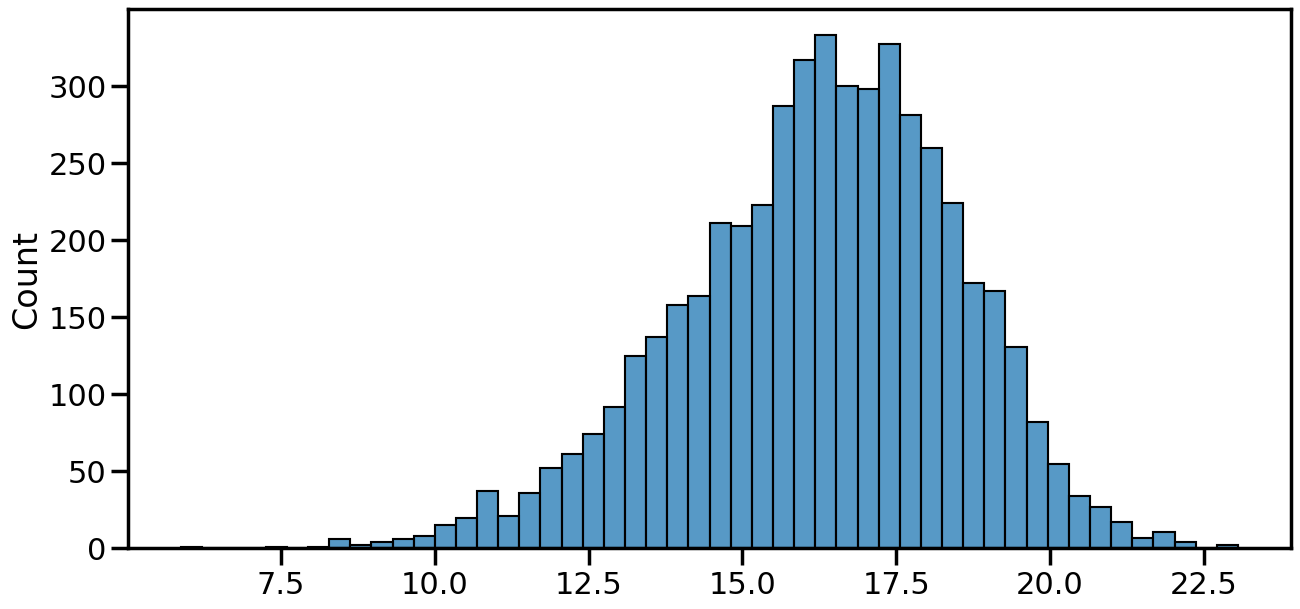

In [6]:
lz_centralities = [LZCentrality(my_ndp_lzgraph,seq) for seq in example_sequences.cdr3_rearrangement]
sns.histplot(lz_centralities)

# K1000 Diversity Index

In [7]:
sequences = example_sequences.cdr3_rearrangement.to_list() # or any list of CDR3 sequence
encoding_function = NDPLZGraph.encode_sequence
number_of_draws = 30 # deault value is 25

k1000_diversity = K1000_Diversity(sequences,encoding_function,draws=number_of_draws)

In [8]:
k1000_diversity

2136.9666666666667

The K1000 Diversity Index estimates the expected number of unique LZ subpatterns when drawing 1000 sequences from the repertoire. Higher values indicate greater diversity.

# Information-Theoretic Metrics

LZGraphs provides several entropy-based metrics to analyze the diversity and complexity of your repertoire.

In [9]:
from LZGraphs import (
    node_entropy,
    edge_entropy,
    graph_entropy,
    sequence_perplexity,
    jensen_shannon_divergence
)

## Node Entropy

Node entropy measures the diversity of nodes (LZ subpatterns) in the graph. Higher entropy indicates more uniform distribution of subpatterns.

In [10]:
node_ent = node_entropy(my_ndp_lzgraph)
print(f"Node Entropy: {node_ent:.4f}")

Node Entropy: 8.7031


## Edge Entropy

Edge entropy measures the diversity of transitions between nodes. Higher entropy indicates more unpredictable transition patterns.

In [11]:
edge_ent = edge_entropy(my_ndp_lzgraph)
print(f"Edge Entropy: {edge_ent:.4f}")

Edge Entropy: 2.3115


## Graph Entropy

Graph entropy combines node and edge entropy to provide an overall measure of graph complexity.

In [12]:
graph_ent = graph_entropy(my_ndp_lzgraph)
print(f"Graph Entropy: {graph_ent:.4f}")

Graph Entropy: 11.0146


## Sequence Perplexity

Perplexity measures how "surprising" a sequence is relative to the graph. Lower perplexity means the sequence is more predictable by the graph model.

In [14]:
# Calculate perplexity for individual sequences
sample_seq = example_sequences['cdr3_rearrangement'].iloc[0]
perplexity = sequence_perplexity(my_ndp_lzgraph, sample_seq)
print(f"Sequence: {sample_seq}")
print(f"Perplexity: {perplexity:.4f}")

Sequence: TGTGCCTGCGTAACACAGGGGGTTTGGTATGGCTACACCTTC
Perplexity: 8.9802


Text(0.5, 1.0, 'Distribution of Sequence Perplexity')

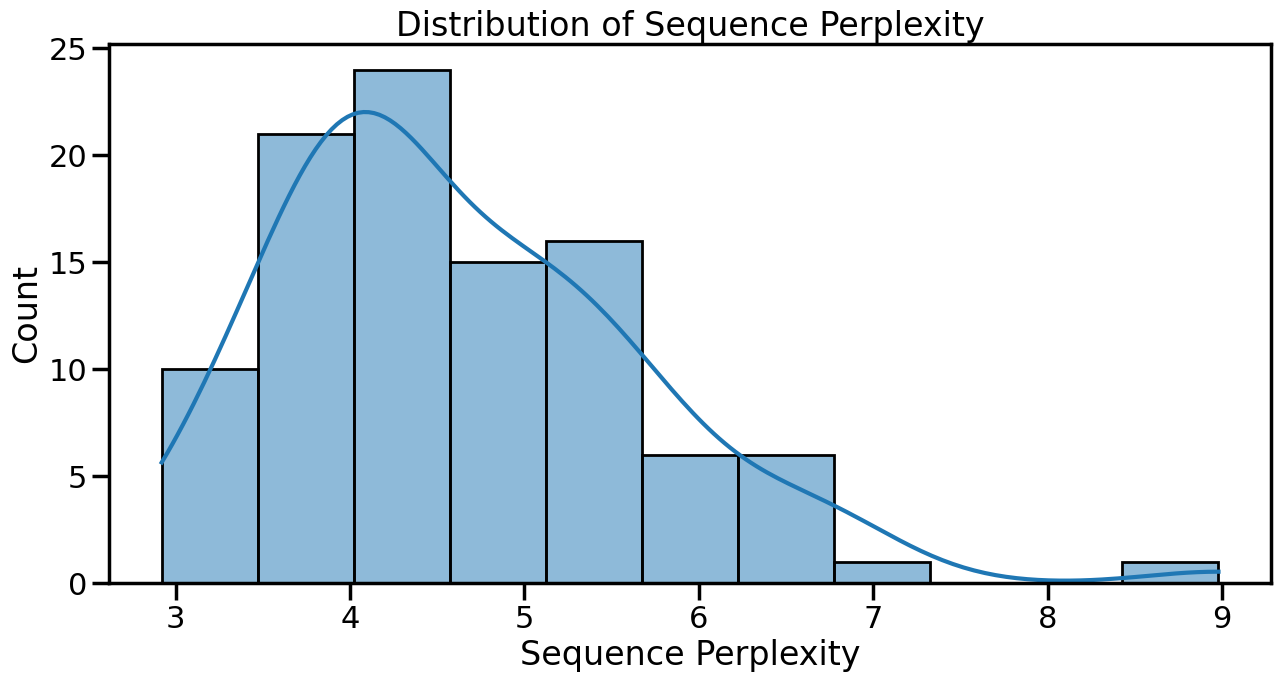

In [15]:
# Compare perplexity distribution across sequences
perplexities = [sequence_perplexity(my_ndp_lzgraph, seq) 
                for seq in example_sequences['cdr3_rearrangement'].iloc[:100]]
sns.histplot(perplexities, kde=True)
plt.xlabel('Sequence Perplexity')
plt.ylabel('Count')
plt.title('Distribution of Sequence Perplexity')

# Comparing Repertoires

## Jensen-Shannon Divergence

The Jensen-Shannon divergence measures the similarity between two repertoires. Values range from 0 (identical) to 1 (completely different).

In [16]:
# Create a second graph from a subset of sequences (simulating a different repertoire)
subset_sequences = example_sequences.iloc[:2500]
second_ndp_graph = NDPLZGraph(subset_sequences)

In [17]:
# Calculate Jensen-Shannon divergence
js_divergence = jensen_shannon_divergence(my_ndp_lzgraph, second_ndp_graph)
print(f"Jensen-Shannon Divergence: {js_divergence:.6f}")
print("(Lower values indicate more similar repertoires)")

Jensen-Shannon Divergence: 0.008828
(Lower values indicate more similar repertoires)


# Summary: All Metrics at a Glance

Here's a convenient way to compute and display all available metrics for a repertoire:

In [18]:
# Compile all metrics into a summary
metrics_summary = {
    'Node Entropy': node_entropy(my_ndp_lzgraph),
    'Edge Entropy': edge_entropy(my_ndp_lzgraph),
    'Graph Entropy': graph_entropy(my_ndp_lzgraph),
    'K1000 Diversity': k1000_diversity,
    'Number of Nodes': len(my_ndp_lzgraph.nodes),
    'Number of Edges': len(my_ndp_lzgraph.edges),
}

# Display as a formatted table
summary_df = pd.DataFrame.from_dict(metrics_summary, orient='index', columns=['Value'])
summary_df.index.name = 'Metric'
summary_df

,Value
Metric,
Node Entropy,8.703056
Edge Entropy,2.311513
Graph Entropy,11.014569
K1000 Diversity,2136.966667
Number of Nodes,3518.000000
Number of Edges,20587.000000


## Note on Graph Types

All metrics work with any LZGraph type (NDPLZGraph, AAPLZGraph, NaiveLZGraph). When comparing repertoires using Jensen-Shannon divergence, both graphs should be of the same type for meaningful comparison.